#### 2) To implement the K-Nearest Neighbours (KNN) algorithm on a Social Network Ads ataset and evaluate the model using Confusion Matrix, Accuracy Error Rate, Precision, and Recall.

#### Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

#### Load the Dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akram24/social-network-ads")

print("Path to dataset files:", path)

100%|██████████| 3.27k/3.27k [00:00<00:00, 5.56MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/akram24/social-network-ads/versions/1


In [4]:
! mv  /root/.cache/kagglehub/datasets/akram24/social-network-ads/versions/1/ /content/

In [5]:
dataset = pd.read_csv('/content/1/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Feature Selection

#### We’ll use Age and EstimatedSalary as independent variables, and Purchased as the target variable.

In [6]:
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values


#### Split the Dataset into Training and Test Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature Scaling (KNN is distance-based, so scaling features is crucial.)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#### Train the KNN Classifier

In [9]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Euclidean distance
classifier.fit(X_train, y_train)


KNeighborsClassifier()

#### Make Predictions

In [10]:
y_pred = classifier.predict(X_test)


### Evaluate the Model
### Confusion Matrix

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[64  4]
 [ 3 29]]


In [12]:
## Accuracy Rate

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

## Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

## Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

### Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Accuracy: 0.93
Error Rate: 0.06999999999999995
Precision: 0.8787878787878788
Recall: 0.90625


#### Visualize the Results

/tmp/ipython-input-328205856.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


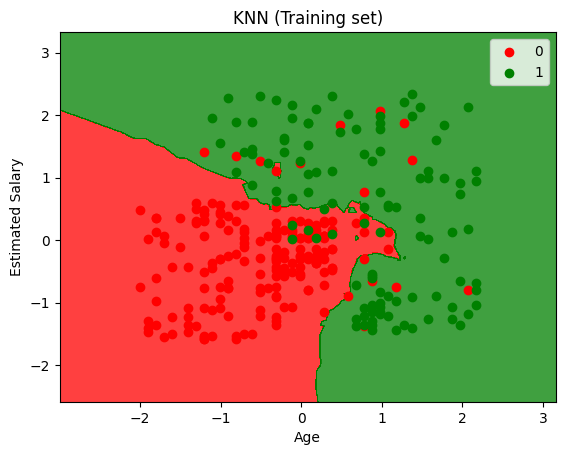

In [13]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
    np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01)
)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('KNN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
